<a href="https://colab.research.google.com/github/tamtamxtamtam/Churn-Prediction/blob/main/Sparkify_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/KL

/content/drive/.shortcut-targets-by-id/1ue41o6pRVu4sqlMEBXCIW9LVcnNdosLa/KL


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
import re
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 
from imblearn.over_sampling import RandomOverSampler 
from imblearn.under_sampling import RandomUnderSampler
import numpy as np
import seaborn as sns

import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import math

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Preprocessing

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/KTLab/Data/3_week_all_fixed_1_2.csv', index_col=False)
df = df.drop(columns = 'Unnamed: 0')
df = df.reindex(sorted(df.columns), axis=1)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (67,72) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df['label'].value_counts()

0.0    33553
1.0     1741
Name: label, dtype: int64

## Nội suy

In [ ]:
columns_list = ['count_songs',
 'weekdays_count_songs',
 'weekend_count_songs',
 'count_distinct_artists',
 'count_login',
 'count_ads',
 'upgrade',
 'count_upgradeview',
 'downgrade',
 'count_downgradeview',
 'count_addfriend',
 'count_thumbsup',
 'count_thumbsdown',
 'count_addplaylist',
 'count_nextsong',
 'count_home',
 'count_logout',
 'count_help',
 'count_cancel',
 'count_cancelview',
 'count_about',
 'count_repeats',
 'time_inter_login',
 'avg_listening_time_session',
 'avg_num_actions_session',
 'days_from_reg']

In [ ]:
def tang_giam(df):
  for index, col in enumerate(columns_list):
    col_1 = col + '_w1'
    col_2 = col + '_w2'
    col_3 = col + '_w3'
    df[col + '_no_increase'] = np.where((df[col_1] > df[col_2]) & (df[col_2] > df[col_3]) , 1, 0 )
    df[col + '_no_decrease'] = np.where((df[col_1] < df[col_2]) & (df[col_2] < df[col_3]) , 1, 0 )
  return df

def noi_suy_max(df):
  for index, col in enumerate(columns_list):
      col_1 = col + '_w1'
      col_2 = col + '_w2'
      col_3 = col + '_w3'
      new_col = col + '_w-w_max'
      df[new_col] = df[col_3] - df[[col_1, col_2]].max(axis=1)
  return df
def noi_suy_min(df):
  for index, col in enumerate(columns_list):
      col_1 = col + '_w1'
      col_2 = col + '_w2'
      col_3 = col + '_w3'
      new_col = col + '_w-w_min'
      df[new_col] = df[col_3] - df[[col_1, col_2]].min(axis=1)
  return df
def noi_suy_avg(df):
  for index, col in enumerate(columns_list):
      col_1 = col + '_w1'
      col_2 = col + '_w2'
      col_3 = col + '_w3'
      new_col = col + '_w-w_avg'
      df[new_col] = df[col_3] - df[[col_1, col_2]].mean(axis=1)
  return df
def hieu(merge):
  for index, col in enumerate(columns_list):
    for i in range(1,3):
      col_1 = col + '_w{}'.format(str(i))
      col_2 = col + '_w{}'.format(str(i+1))
      new_col = col + '_w{}-w{}'.format(str(i+1), str(i))
      merge[new_col] = merge[col_2] - merge[col_1]
  return merge

In [ ]:
def noi_suy(df):
  df = hieu(df)
  df = tang_giam(df)
  df = noi_suy_max(df)
  df = noi_suy_min(df)
  df = noi_suy_avg(df)
  return df

In [ ]:
df = noi_suy(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


## Rời rạc hoá

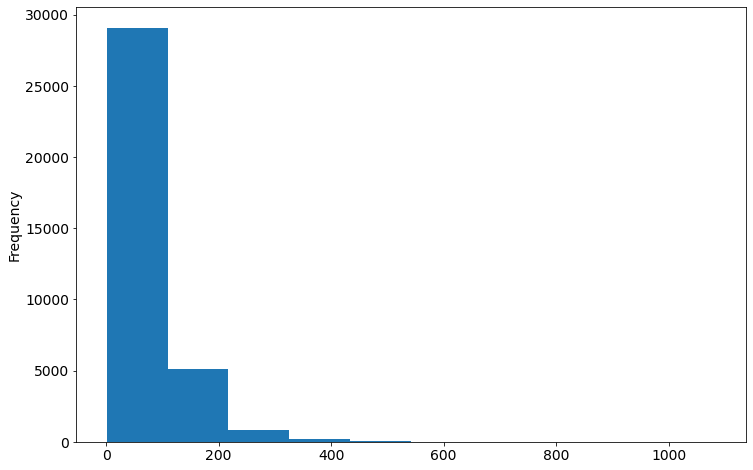

In [ ]:
df['avg_num_actions_session_w1'].plot(kind='hist')

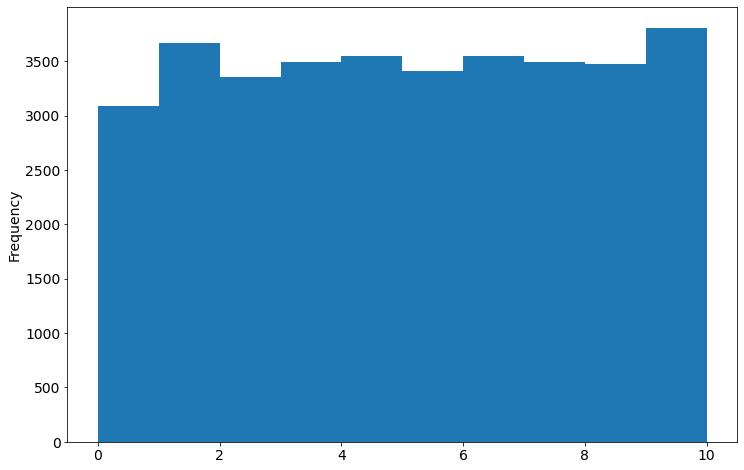

In [ ]:
df['avg_num_actions_session_w1'].plot(kind='hist')

In [ ]:
def binning_data(df, col):
  right = df[col].max()
  print(right)
  right_index = len(df[col])
  bin = []
  left = df[col].min()
  bin.append(left)
  print(bin)
  df_values = df[col].value_counts().sort_index()
  for index, x in enumerate(df_values):
    #  print(df_values.values[0:index].sum())
    if df_values.values[0:index].sum() > df_values.values.sum()*0.99:
      right = df_values.index[index]
      right_index = index
      break 
  i = 1
  for index, x in enumerate(df_values):
      if df_values.values[0:index].sum() > df_values.values[0:right_index].sum()*0.1*i:
        bin.append(df_values.index[index])
        i = i + 1
  # if df[col].max() != right_index:
  #   bin.append(df[col].max())
  # print(bin)
  bin = list(set(bin))
  # print(bin)
  bin.sort()
  print(bin)
  df[col] = pd.cut(df[col],bins = bin, labels=False)
  return df

In [ ]:
df['count_songs_w1'].sum()

5840255.0

In [ ]:
binning_data(df, 'count_songs_w1')['count_songs_w1']

10.0
[0.0]
[0.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]


0        NaN
1        6.0
2        6.0
3        5.0
4        0.0
        ... 
35289    0.0
35290    7.0
35291    0.0
35292    4.0
35293    6.0
Name: count_songs_w1, Length: 35294, dtype: float64

In [ ]:
for index, col in enumerate(columns_list):
      col_1 = col + '_w1'
      col_2 = col + '_w2'
      col_3 = col + '_w3'
      df = binning_data(df, col_1)
      df = binning_data(df, col_2)
      df = binning_data(df, col_3)

## Chuẩn hoá & Label Encoding

In [ ]:
def norm(train):
  le = preprocessing.LabelEncoder()
  for column_name in train.columns:
    if train[column_name].dtype == object:
        train[column_name] = le.fit_transform(train[column_name])
    elif column_name == 'label':
        pass
    else:
        #Z
        train[column_name] = (train[column_name] - train[column_name].mean())/train[column_name].std(ddof=0)
        #Min max
        # train[column_name] = (train[column_name] - train[column_name].min()) / (train[column_name].max() - train[column_name].min()) 
  return train

In [ ]:
df = norm(df)

In [ ]:
for i in df.columns[df.isnull().any(axis=0)]:   
    df[i].fillna(df[i].mean(),inplace=True)

# Feture selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2

In [ ]:
X, y = df.drop('label',axis=1), df['label']

## F-regression

In [ ]:
selector = SelectKBest(f_classif, k = "all")
X_new = selector.fit_transform(X, y)
names = X.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
ns_df_sorted

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 18  19  20  21  22  23 120 121 122 123 172 173 174 175 206 207 232 233
 258 259] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


,Feat_names,F_Scores
164,count_nextsong_no_increase,17400.397034
136,count_songs_no_increase,17400.397034
142,count_distinct_artists_no_increase,16604.848107
158,count_thumbsup_no_increase,7186.482179
162,count_addplaylist_no_increase,6317.397262
166,count_home_no_increase,6256.443870
138,weekdays_count_songs_no_increase,5747.139527
184,avg_num_actions_session_no_increase,4061.596652
160,count_thumbsdown_no_increase,3136.453989
156,count_addfriend_no_increase,2695.483251


In [ ]:
df[list(ns_df_sorted['Feat_names'][0:150])]

,count_nextsong_no_increase,count_songs_no_increase,count_distinct_artists_no_increase,count_thumbsup_no_increase,count_addplaylist_no_increase,count_home_no_increase,weekdays_count_songs_no_increase,avg_num_actions_session_no_increase,count_thumbsdown_no_increase,count_addfriend_no_increase,count_repeats_no_increase,count_distinct_artists_w-w_avg,count_nextsong_w1,count_songs_w1,count_nextsong_w-w_avg,count_songs_w-w_avg,count_logout_no_increase,count_distinct_artists_w1,count_distinct_artists_w-w_max,count_thumbsdown_w1,count_nextsong_w-w_max,count_songs_w-w_max,count_downgradeview_no_increase,count_addplaylist_w1,count_distinct_artists_w-w_min,count_thumbsup_w-w_avg,weekdays_count_songs_w1,count_downgradeview_w1,count_addplaylist_w-w_avg,count_nextsong_w-w_min,count_songs_w-w_min,count_logout_w1,weekdays_count_songs_w-w_avg,count_addplaylist_w-w_max,count_help_no_increase,count_thumbsup_w-w_max,weekdays_count_songs_w-w_max,count_addfriend_w1,count_repeats_w1,count_thumbsup_w1,count_thumbsup_w-w_min,count_thumbsdown_w-w_max,count_thumbsdown_w-w_avg,count_addplaylist_w-w_min,count_logout_w-w_max,count_logout_w-w_avg,weekdays_count_songs_w-w_min,count_downgradeview_w-w_max,count_addfriend_w-w_max,count_addfriend_w-w_avg,weekend_count_songs_w1,avg_num_actions_session_w1,count_downgradeview_w-w_avg,count_repeats_w-w_max,weekend_count_songs_no_increase,count_thumbsdown_w-w_min,count_distinct_artists_w2-w1,avg_num_actions_session_w-w_avg,count_nextsong_no_decrease,count_songs_no_decrease,count_distinct_artists_no_decrease,count_logout_w-w_min,count_nextsong_w2-w1,count_songs_w2-w1,avg_num_actions_session_w-w_min,count_addfriend_w-w_min,count_repeats_w-w_avg,count_addplaylist_w2-w1,avg_num_actions_session_w-w_max,count_login_no_increase,count_thumbsup_w2-w1,weekdays_count_songs_no_decrease,count_distinct_artists_w3-w2,avg_num_actions_session_no_decrease,count_help_w-w_max,count_nextsong_w3-w2,count_songs_w3-w2,weekdays_count_songs_w2-w1,count_thumbsup_no_decrease,count_home_no_decrease,count_thumbsdown_w2-w1,weekend_count_songs_w-w_max,count_downgradeview_w-w_min,count_thumbsup_w3-w2,count_help_w-w_avg,weekdays_count_songs_w3-w2,count_downgradeview_w2-w1,count_addfriend_w2-w1,count_addplaylist_w3-w2,count_addplaylist_no_decrease,count_logout_w2-w1,weekend_count_songs_w-w_avg,count_ads_w1,time_inter_login_w-w_max,days_from_reg_w-w_max,days_from_reg_w-w_avg,count_repeats_w2-w1,days_from_reg_w-w_min,days_from_reg_w2-w1,days_from_reg_w3-w2,time_inter_login_w-w_avg,count_thumbsdown_w3-w2,avg_num_actions_session_w2-w1,count_logout_w3-w2,count_about_no_increase,count_repeats_w-w_min,time_inter_login_w1,count_addfriend_w3-w2,days_from_reg_no_increase,days_from_reg_no_decrease,count_addfriend_no_decrease,count_home_w-w_max,count_downgradeview_w3-w2,avg_num_actions_session_w3,count_thumbsdown_no_decrease,count_logout_no_decrease,weekend_count_songs_w2-w1,count_help_w2-w1,count_help_w-w_min,avg_num_actions_session_w3-w2,count_ads_no_increase,count_thumbsup_w3,upgrade_w1,weekend_count_songs_w-w_min,count_distinct_artists_w3,count_ads_w-w_max,count_repeats_w3-w2,count_nextsong_w3,count_songs_w3,avg_listening_time_session_no_increase,time_inter_login_w-w_min,count_downgradeview_no_decrease,count_addplaylist_w3,weekdays_count_songs_w3,downgrade_w1,count_help_w3-w2,count_repeats_no_decrease,count_upgradeview_w1,weekend_count_songs_no_decrease,count_thumbsdown_w2,count_help_no_decrease,count_addfriend_w3,count_home_w-w_avg,time_inter_login_w3-w2,count_ads_w-w_avg,upgrade_w-w_max,weekend_count_songs_w3-w2,count_logout_w2,downgrade_w-w_max,count_about_w-w_max
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.640950,0.001517,0.001517,0.596973,0.596973,0.0,0.002247,0.683002,0.000000,0.652725,0.652725,0.0,0.000000,0.536949,0.553055,0.002209,0.00,0.519737,0.493929,0.493929,0.037037,0.563847,0.585366,0.0,0.624277,0.657000,0.000,0.000000,0.000000,0.477419,0.523810,0.449541,0.4750,0.608696,0.500000,0.516916,0.531915,0.575342,0.526316,0.000000,0.001848,0.42857

## Chi-square

In [ ]:
selector = SelectKBest(chi2, k = "all")
#New dataframe with the selected features for later use in the classifier. fit() method works too, if you want only the feature names and their corresponding scores
X_new = selector.fit_transform(X, y)
names = X.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
chi_ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
chi_ns_df_sorted

,Feat_names,F_Scores
164,count_nextsong_no_increase,11453.226733
136,count_songs_no_increase,11453.226733
142,count_distinct_artists_no_increase,11090.728453
158,count_thumbsup_no_increase,5830.766440
162,count_addplaylist_no_increase,5230.716732
...,...,...
21,count_cancelview_w1,NaN
22,count_cancelview_w2,NaN
122,count_cancelview_w2-w1,NaN
23,count_cancelview_w3,NaN


## Random forest

In [ ]:
rf = RandomForestRegressor(n_estimators=10)
rf.fit(X, y)

RandomForestRegressor(n_estimators=10)

In [ ]:
import operator
order = []
dictionary = dict(zip(X.columns, rf.feature_importances_))
for i in sorted(dictionary.items(), key=operator.itemgetter(1), reverse=True):
  order.append(i[0])
print(order)

['count_nextsong_no_increase', 'count_songs_no_increase', 'count_distinct_artists_no_increase', 'count_addplaylist_no_increase', 'count_distinct_artists_w-w_avg', 'days_from_reg_w-w_max', 'count_home_no_increase', 'count_thumbsup_no_increase', 'avg_listening_time_session_no_increase', 'weekend_count_songs_no_increase', 'count_thumbsdown_no_increase', 'count_nextsong_w-w_avg', 'avg_num_actions_session_no_increase', 'avg_listening_time_session_w3', 'days_from_reg_w2-w1', 'avg_listening_time_session_w2-w1', 'count_songs_w-w_avg', 'avg_num_actions_session_w2-w1', 'avg_listening_time_session_w-w_min', 'avg_listening_time_session_no_decrease', 'time_inter_login_w2-w1', 'count_addfriend_no_increase', 'userId', 'avg_num_actions_session_w3', 'avg_listening_time_session_w-w_max', 'count_distinct_artists_w-w_max', 'count_distinct_artists_w2-w1', 'count_help_no_increase', 'avg_num_actions_session_w1', 'count_home_w-w_avg', 'avg_num_actions_session_w2', 'time_inter_login_w3-w2', 'count_nextsong_w-w

# Split data

In [ ]:
def split_df(df):
  X_train, X_test, y_train, y_test = train_test_split(df[list(ns_df_sorted['Feat_names'][0:200])], 
                                                    df['label'], test_size=0.2, 
                                                    random_state=42)
  return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = split_df(df)

# Random Sampling
Kết hợp giữ SMOTE và under-sampling

In [ ]:
sm = SMOTE(sampling_strategy=0.5,random_state=0)
rus = RandomUnderSampler(sampling_strategy=1.0,random_state=0)
X_sm, y_sm = sm.fit_resample(X_train, y_train)
X_rus, y_rus = rus.fit_resample(X_train, y_train)
X_hybrid, y_hybrid = rus.fit_resample(X_sm, y_sm)

In [ ]:
y_train

23149    0.0
10914    0.0
11342    0.0
19685    0.0
9251     0.0
        ... 
16850    0.0
6265     0.0
11284    0.0
860      0.0
15795    0.0
Name: label, Length: 28235, dtype: float64

# Model

In [ ]:
class NeuralDecisionTree(keras.Model):
    def __init__(self, depth, num_features, used_features_rate, num_classes):
        super(NeuralDecisionTree, self).__init__()
        self.depth = depth
        self.num_leaves = 2 ** depth
        self.num_classes = num_classes

        # Create a mask for the randomly selected features.
        num_used_features = int(num_features * used_features_rate)
        one_hot = np.eye(num_features)
        sampled_feature_indicies = np.random.choice(
            np.arange(num_features), num_used_features, replace=False
        )
        self.used_features_mask = one_hot[sampled_feature_indicies]

        # Initialize the weights of the classes in leaves.
        self.pi = tf.Variable(
            initial_value=tf.random_normal_initializer()(
                shape=[self.num_leaves, self.num_classes]
            ),
            dtype="float32",
            trainable=True,
        )

        # Initialize the stochastic routing layer.
        self.decision_fn = layers.Dense(
            units=self.num_leaves, activation="sigmoid", name="decision"
        )

    def call(self, features):
        batch_size = tf.shape(features)[0]

        # Apply the feature mask to the input features.
        features = tf.matmul(
            features, self.used_features_mask, transpose_b=True
        )  # [batch_size, num_used_features]
        # Compute the routing probabilities.
        decisions = tf.expand_dims(
            self.decision_fn(features), axis=2
        )  # [batch_size, num_leaves, 1]
        # Concatenate the routing probabilities with their complements.
        decisions = layers.concatenate(
            [decisions, 1 - decisions], axis=2
        )  # [batch_size, num_leaves, 2]

        mu = tf.ones([batch_size, 1, 1])

        begin_idx = 1
        end_idx = 2
        # Traverse the tree in breadth-first order.
        for level in range(self.depth):
            mu = tf.reshape(mu, [batch_size, -1, 1])  # [batch_size, 2 ** level, 1]
            mu = tf.tile(mu, (1, 1, 2))  # [batch_size, 2 ** level, 2]
            level_decisions = decisions[
                :, begin_idx:end_idx, :
            ]  # [batch_size, 2 ** level, 2]
            mu = mu * level_decisions  # [batch_size, 2**level, 2]
            begin_idx = end_idx
            end_idx = begin_idx + 2 ** (level + 1)

        mu = tf.reshape(mu, [batch_size, self.num_leaves])  # [batch_size, num_leaves]
        probabilities = keras.activations.softmax(self.pi)  # [num_leaves, num_classes]
        outputs = tf.matmul(mu, probabilities)  # [batch_size, num_classes]
        return outputs

class NeuralDecisionForest(keras.Model):
    def __init__(self, num_trees, depth, num_features, used_features_rate, num_classes):
        super(NeuralDecisionForest, self).__init__()
        self.ensemble = []
        # Initialize the ensemble by adding NeuralDecisionTree instances.
        # Each tree will have its own randomly selected input features to use.
        for _ in range(num_trees):
            self.ensemble.append(
                NeuralDecisionTree(depth, num_features, used_features_rate, num_classes)
            )

    def call(self, inputs):
        # Initialize the outputs: a [batch_size, num_classes] matrix of zeros.
        batch_size = tf.shape(inputs)[0]
        outputs = tf.zeros([batch_size, num_classes])

        # Aggregate the outputs of trees in the ensemble.
        for tree in self.ensemble:
            outputs += tree(inputs)
        # Divide the outputs by the ensemble size to get the average.
        outputs /= len(self.ensemble)
        return outputs

In [ ]:
df.shape[1]

267

In [ ]:
df

,avg_listening_time_session_no_decrease,avg_listening_time_session_no_increase,avg_listening_time_session_w1,avg_listening_time_session_w2,avg_listening_time_session_w3,avg_num_actions_session_no_decrease,avg_num_actions_session_no_increase,avg_num_actions_session_w1,avg_num_actions_session_w2,avg_num_actions_session_w3,count_about_no_decrease,count_about_no_increase,count_about_w1,count_about_w2,count_about_w3,count_addfriend_no_decrease,count_addfriend_no_increase,count_addfriend_w1,count_addfriend_w2,count_addfriend_w3,count_addplaylist_no_decrease,count_addplaylist_no_increase,count_addplaylist_w1,count_addplaylist_w2,count_addplaylist_w3,count_ads_no_decrease,count_ads_no_increase,count_ads_w1,count_ads_w2,count_ads_w3,count_cancel_no_decrease,count_cancel_no_increase,count_cancel_w1,count_cancel_w2,count_cancel_w3,count_cancelview_no_decrease,count_cancelview_no_increase,count_cancelview_w1,count_cancelview_w2,count_cancelview_w3,count_distinct_artists_no_decrease,count_distinct_artists_no_increase,count_distinct_artists_w1,count_distinct_artists_w2,count_distinct_artists_w3,count_downgradeview_no_decrease,count_downgradeview_no_increase,count_downgradeview_w1,count_downgradeview_w2,count_downgradeview_w3,count_help_no_decrease,count_help_no_increase,count_help_w1,count_help_w2,count_help_w3,count_home_no_decrease,count_home_no_increase,count_home_w1,count_home_w2,count_home_w3,count_login_no_decrease,count_login_no_increase,count_login_w1,count_login_w2,count_login_w3,count_logout_no_decrease,count_logout_no_increase,count_logout_w1,count_logout_w2,count_logout_w3,count_nextsong_no_decrease,count_nextsong_no_increase,count_nextsong_w1,count_nextsong_w2,count_nextsong_w3,count_repeats_no_decrease,count_repeats_no_increase,count_repeats_w1,count_repeats_w2,count_repeats_w3,count_songs_no_decrease,count_songs_no_increase,count_songs_w1,count_songs_w2,count_songs_w3,count_thumbsdown_no_decrease,count_thumbsdown_no_increase,count_thumbsdown_w1,count_thumbsdown_w2,count_thumbsdown_w3,count_thumbsup_no_decrease,count_thumbsup_no_increase,count_thumbsup_w1,count_thumbsup_w2,count_thumbsup_w3,count_upgradeview_no_decrease,count_upgradeview_no_increase,count_upgradeview_w1,count_upgradeview_w2,count_upgradeview_w3,days_from_reg_no_decrease,days_from_reg_no_increase,days_from_reg_w1,days_from_reg_w2,days_from_reg_w3,downgrade_no_decrease,downgrade_no_increase,downgrade_w1,downgrade_w2,downgrade_w3,gender_w1,label,level_w1,level_w2,level_w3,no_decrease,no_increase,state_w1,time_inter_login_no_decrease,time_inter_login_no_increase,time_inter_login_w1,time_inter_login_w2,time_inter_login_w3,upgrade_no_decrease,upgrade_no_increase,upgrade_w1,upgrade_w2,upgrade_w3,userId,weekdays_count_songs_no_decrease,weekdays_count_songs_no_increase,weekdays_count_songs_w1,weekdays_count_songs_w2,weekdays_count_songs_w3,weekend_count_songs_no_decrease,weekend_count_songs_no_increase,weekend_count_songs_w1,weekend_count_songs_w2,weekend_count_songs_w3,count_songs_w2-w1,count_songs_w3-w2,weekdays_count_songs_w2-w1,weekdays_count_songs_w3-w2,weekend_count_songs_w2-w1,weekend_count_songs_w3-w2,count_distinct_artists_w2-w1,count_distinct_artists_w3-w2,count_login_w2-w1,count_login_w3-w2,count_ads_w2-w1,count_ads_w3-w2,upgrade_w2-w1,upgrade_w3-w2,count_upgradeview_w2-w1,count_upgradeview_w3-w2,downgrade_w2-w1,downgrade_w3-w2,count_downgradeview_w2-w1,count_downgradeview_w3-w2,count_addfriend_w2-w1,count_addfriend_w3-w2,count_thumbsup_w2-w1,count_thumbsup_w3-w2,count_thumbsdown_w2-w1,count_thumbsdown_w3-w2,count_addplaylist_w2-w1,count_addplaylist_w3-w2,count_nextsong_w2-w1,count_nextsong_w3-w2,count_home_w2-w1,count_home_w3-w2,count_logout_w2-w1,count_logout_w3-w2,count_help_w2-w1,count_help_w3-w2,count_cancel_w2-w1,count_cancel_w3-w2,count_cancelview_w2-w1,count_cancelview_w3-w2,count_about_w2-w1,count_about_w3-w2,count_repeats_w2-w1,count_repeats_w3-w2,time_inter_login_w2-w1,time_inter_login_w3-w2,avg_listening_time_session_w2-w1,avg_listening_time_sess

In [ ]:
X_train.shape[1]

266

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35294 entries, 0 to 35293
Columns: 267 entries, avg_listening_time_session_w1 to days_from_reg_w-w_avg
dtypes: float64(262), int64(5)
memory usage: 71.9 MB


In [ ]:
learning_rate = 0.01
batch_size = 256
num_epochs = 5
hidden_units = [64, 64]

num_trees = 50
depth = 10
used_features_rate = 0.9
num_classes = 2
num_features = X_train.shape[1]



forest_model = NeuralDecisionForest(
        num_trees, depth, num_features, used_features_rate, num_classes)

forest_model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss=keras.losses.SparseCategoricalCrossentropy(),
        metrics=[keras.metrics.SparseCategoricalAccuracy()],
    )
forest_model.fit(X_rus, y_rus, epochs=num_epochs)
preds = forest_model.predict(X_test)

Epoch 1/5
86/86 [==============================] - 67s 151ms/step - loss: 0.4967 - sparse_categorical_accuracy: 0.8096
Epoch 2/5
86/86 [==============================] - 13s 149ms/step - loss: 0.2442 - sparse_categorical_accuracy: 0.9346
Epoch 3/5
86/86 [==============================] - 13s 148ms/step - loss: 0.1814 - sparse_categorical_accuracy: 0.9481
Epoch 4/5
86/86 [==============================] - 13s 146ms/step - loss: 0.1519 - sparse_categorical_accuracy: 0.9591
Epoch 5/5
86/86 [==============================] - 13s 146ms/step - loss: 0.1347 - sparse_categorical_accuracy: 0.9653


In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
auc_score = roc_auc_score(y_test,preds[, :1])
auc_score

0.9565042876997191

In [ ]:
print('confusion matrix:\n',confusion_matrix(y_test,class_preds))
print('classification report:\n',classification_report(y_test,class_preds,   digits=5))

confusion matrix:
 [[6194  492]
 [   5  368]]
classification report:
               precision    recall  f1-score   support

         0.0    0.99919   0.92641   0.96143      6686
         1.0    0.42791   0.98660   0.59692       373

    accuracy                        0.92959      7059
   macro avg    0.71355   0.95650   0.77917      7059
weighted avg    0.96901   0.92959   0.94217      7059



## ML models

In [ ]:
def rf_model(X_train, y_train):
  rf = RandomForestClassifier(n_estimators=100, max_depth=10)
  rf.fit(X_train, y_train)
  predictions = rf.predict(X_test)
  return predictions

from sklearn import svm
def svm_model(X_train, y_train):
  model = svm.LinearSVC()
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  return predictions

from sklearn.neighbors import KNeighborsClassifier
def knn_model(X_train, y_train):
  model = KNeighborsClassifier(n_neighbors=3)
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  return predictions

from sklearn.naive_bayes import GaussianNB
def nb_model(X_train, y_train):
  model = GaussianNB()
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  return predictions

from sklearn.neural_network import MLPClassifier
def mlp_model(X_train, y_train):
  model = MLPClassifier(random_state=1, max_iter=300)
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  return predictions

In [ ]:
X_train, y_train = X_hybrid, y_hybrid

In [ ]:
rf_predictions = rf_model(X_train, y_train)
print('confusion matrix:\n',confusion_matrix(y_test,rf_predictions))
print('classification report:\n',classification_report(y_test,rf_predictions))

confusion matrix:
 [[6272  414]
 [ 133  240]]
classification report:
               precision    recall  f1-score   support

         0.0       0.98      0.94      0.96      6686
         1.0       0.37      0.64      0.47       373

    accuracy                           0.92      7059
   macro avg       0.67      0.79      0.71      7059
weighted avg       0.95      0.92      0.93      7059



In [ ]:
svm_predictions = svm_model(X_train, y_train)
print('confusion matrix:\n',confusion_matrix(y_test,svm_predictions))
print('classification report:\n',classification_report(y_test,svm_predictions))

confusion matrix:
 [[5455 1231]
 [  57  316]]
classification report:
               precision    recall  f1-score   support

         0.0       0.99      0.82      0.89      6686
         1.0       0.20      0.85      0.33       373

    accuracy                           0.82      7059
   macro avg       0.60      0.83      0.61      7059
weighted avg       0.95      0.82      0.86      7059



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
knn_predictions = knn_model(X_train, y_train)
print('confusion matrix:\n',confusion_matrix(y_test,knn_predictions))
print('classification report:\n',classification_report(y_test,knn_predictions))

confusion matrix:
 [[5492 1194]
 [ 149  224]]
classification report:
               precision    recall  f1-score   support

         0.0       0.97      0.82      0.89      6686
         1.0       0.16      0.60      0.25       373

    accuracy                           0.81      7059
   macro avg       0.57      0.71      0.57      7059
weighted avg       0.93      0.81      0.86      7059



In [ ]:
nb_predictions = nb_model(X_train, y_train)
print('confusion matrix:\n',confusion_matrix(y_test,nb_predictions))
print('classification report:\n',classification_report(y_test,nb_predictions))

confusion matrix:
 [[ 402 6284]
 [   5  368]]
classification report:
               precision    recall  f1-score   support

         0.0       0.99      0.06      0.11      6686
         1.0       0.06      0.99      0.10       373

    accuracy                           0.11      7059
   macro avg       0.52      0.52      0.11      7059
weighted avg       0.94      0.11      0.11      7059



In [ ]:
mlp_predictions = mlp_model(X_train, y_train)
print('confusion matrix:\n',confusion_matrix(y_test,mlp_predictions))
print('classification report:\n',classification_report(y_test,mlp_predictions))

confusion matrix:
 [[6131  555]
 [ 107  266]]
classification report:
               precision    recall  f1-score   support

         0.0       0.98      0.92      0.95      6686
         1.0       0.32      0.71      0.45       373

    accuracy                           0.91      7059
   macro avg       0.65      0.82      0.70      7059
weighted avg       0.95      0.91      0.92      7059



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
